In [1]:
print("Hello world")

Hello world


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math, copy

### Computing the cost function (for regressor with one feature)

In [3]:
x = np.array([1.0, 2.0])
y = np.array([300.0, 500.0])

In [5]:
def compute_cost(x, y, w, b):
    total_cost = 0
    for i in range(len(x)):
        equ = w * x[i] + b
        cost = (equ - y[i]) ** 2
        total_cost += cost
    return total_cost / (2 * len(x))

### Computing Gradient descent (for regressor with one feature)

In [19]:
def compute_gradient(x, y, w, b):
    d_wb_w = 0
    d_wb_b = 0
    m = len(x)
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        d_wb_w += dj_dw_i
        d_wb_b += dj_db_i
    d_wb_w = d_wb_w / m
    d_wb_b = d_wb_b / m
    return d_wb_w, d_wb_b


### Calculating Gradient descent for finding optimal values of w and b

In [20]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, compute_cost, compute_gradient):
    w = copy.deepcopy(w_in)
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        b = b - alpha * dj_dw
        w = w - alpha * dj_db
        if i < 100000:  # -> Prevent exhaustion of RAM
            J_history.append(compute_cost(x, y, w, b))
            p_history.append([w,b])
        if i % math.ceil(num_iters /10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e}", f"dj_dw : {dj_dw:0.3e}, dj_db : {dj_db : 0.3e}", f"w : {w : 0.3e}, b : {b:0.5e}")
    return w, b, J_history, p_history # For graphing


In [22]:
w_init = 0
b_init = 0
iterations = 10000
tmp_alpha = 1.0e-2
w_final, b_final, J_history, p_history = gradient_descent(x, y, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print("w -> ", w_final, "b_final ->", b_final)

Iteration    0: Cost 7.99e+04 dj_dw : -6.500e+02, dj_db : -4.000e+02 w :  4.000e+00, b : 6.50000e+00
Iteration 1000: Cost 3.04e+03 dj_dw : -1.974e+01, dj_db :  1.248e+01 w :  4.601e+01, b : 3.43485e+02
Iteration 2000: Cost 1.54e+04 dj_dw : -4.442e+01, dj_db :  2.809e+01 w : -1.465e+02, b : 6.47912e+02
Iteration 3000: Cost 7.80e+04 dj_dw : -9.996e+01, dj_db :  6.322e+01 w : -5.798e+02, b : 1.33296e+03
Iteration 4000: Cost 3.95e+05 dj_dw : -2.249e+02, dj_db :  1.423e+02 w : -1.555e+03, b : 2.87452e+03
Iteration 5000: Cost 2.00e+06 dj_dw : -5.062e+02, dj_db :  3.201e+02 w : -3.749e+03, b : 6.34348e+03
Iteration 6000: Cost 1.01e+07 dj_dw : -1.139e+03, dj_db :  7.204e+02 w : -8.686e+03, b : 1.41496e+04
Iteration 7000: Cost 5.13e+07 dj_dw : -2.563e+03, dj_db :  1.621e+03 w : -1.980e+04, b : 3.17158e+04
Iteration 8000: Cost 2.60e+08 dj_dw : -5.768e+03, dj_db :  3.648e+03 w : -4.480e+04, b : 7.12447e+04
Iteration 9000: Cost 1.32e+09 dj_dw : -1.298e+04, dj_db :  8.209e+03 w : -1.011e+05, b : 1.

In [28]:
df = pd.read_csv('Housing.csv')

In [29]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [82]:
price = df['price'] / df['price'].max()
area = df['area'] / df['area'].max()

In [70]:
price

0      1.000000
1      0.921053
2      0.921053
3      0.918421
4      0.857895
         ...   
540    0.136842
541    0.132868
542    0.131579
543    0.131579
544    0.131579
Name: price, Length: 545, dtype: float64

In [71]:
area

0      0.458025
1      0.553086
2      0.614815
3      0.462963
4      0.458025
         ...   
540    0.185185
541    0.148148
542    0.223457
543    0.179630
544    0.237654
Name: area, Length: 545, dtype: float64

In [95]:
w, b, J_history, p_history = gradient_descent(area, price, 0, 0, 0.003, 9000, compute_cost, compute_gradient)

Iteration    0: Cost 7.38e-02 dj_dw : -1.240e-01, dj_db : -3.584e-01 w :  1.075e-03, b : 3.72082e-04
Iteration  900: Cost 8.90e-03 dj_dw : -2.085e-02, dj_db : -5.922e-02 w :  4.498e-01, b : 1.56279e-01
Iteration 1800: Cost 7.09e-03 dj_dw : -3.669e-03, dj_db : -9.313e-03 w :  5.232e-01, b : 1.82771e-01
Iteration 2700: Cost 7.04e-03 dj_dw : -8.193e-04, dj_db : -9.505e-04 w :  5.338e-01, b : 1.87728e-01
Iteration 3600: Cost 7.04e-03 dj_dw : -3.599e-04, dj_db :  4.891e-04 w :  5.339e-01, b : 1.89135e-01
Iteration 4500: Cost 7.04e-03 dj_dw : -3.003e-04, dj_db :  7.780e-04 w :  5.321e-01, b : 1.89996e-01
Iteration 5400: Cost 7.05e-03 dj_dw : -3.085e-04, dj_db :  8.789e-04 w :  5.299e-01, b : 1.90812e-01
Iteration 6300: Cost 7.05e-03 dj_dw : -3.294e-04, dj_db :  9.524e-04 w :  5.274e-01, b : 1.91672e-01
Iteration 7200: Cost 7.05e-03 dj_dw : -3.540e-04, dj_db :  1.026e-03 w :  5.247e-01, b : 1.92594e-01
Iteration 8100: Cost 7.05e-03 dj_dw : -3.807e-04, dj_db :  1.103e-03 w :  5.219e-01, b : 1.

In [96]:
w, b

(0.5187770090477928, 0.19465052980221892)

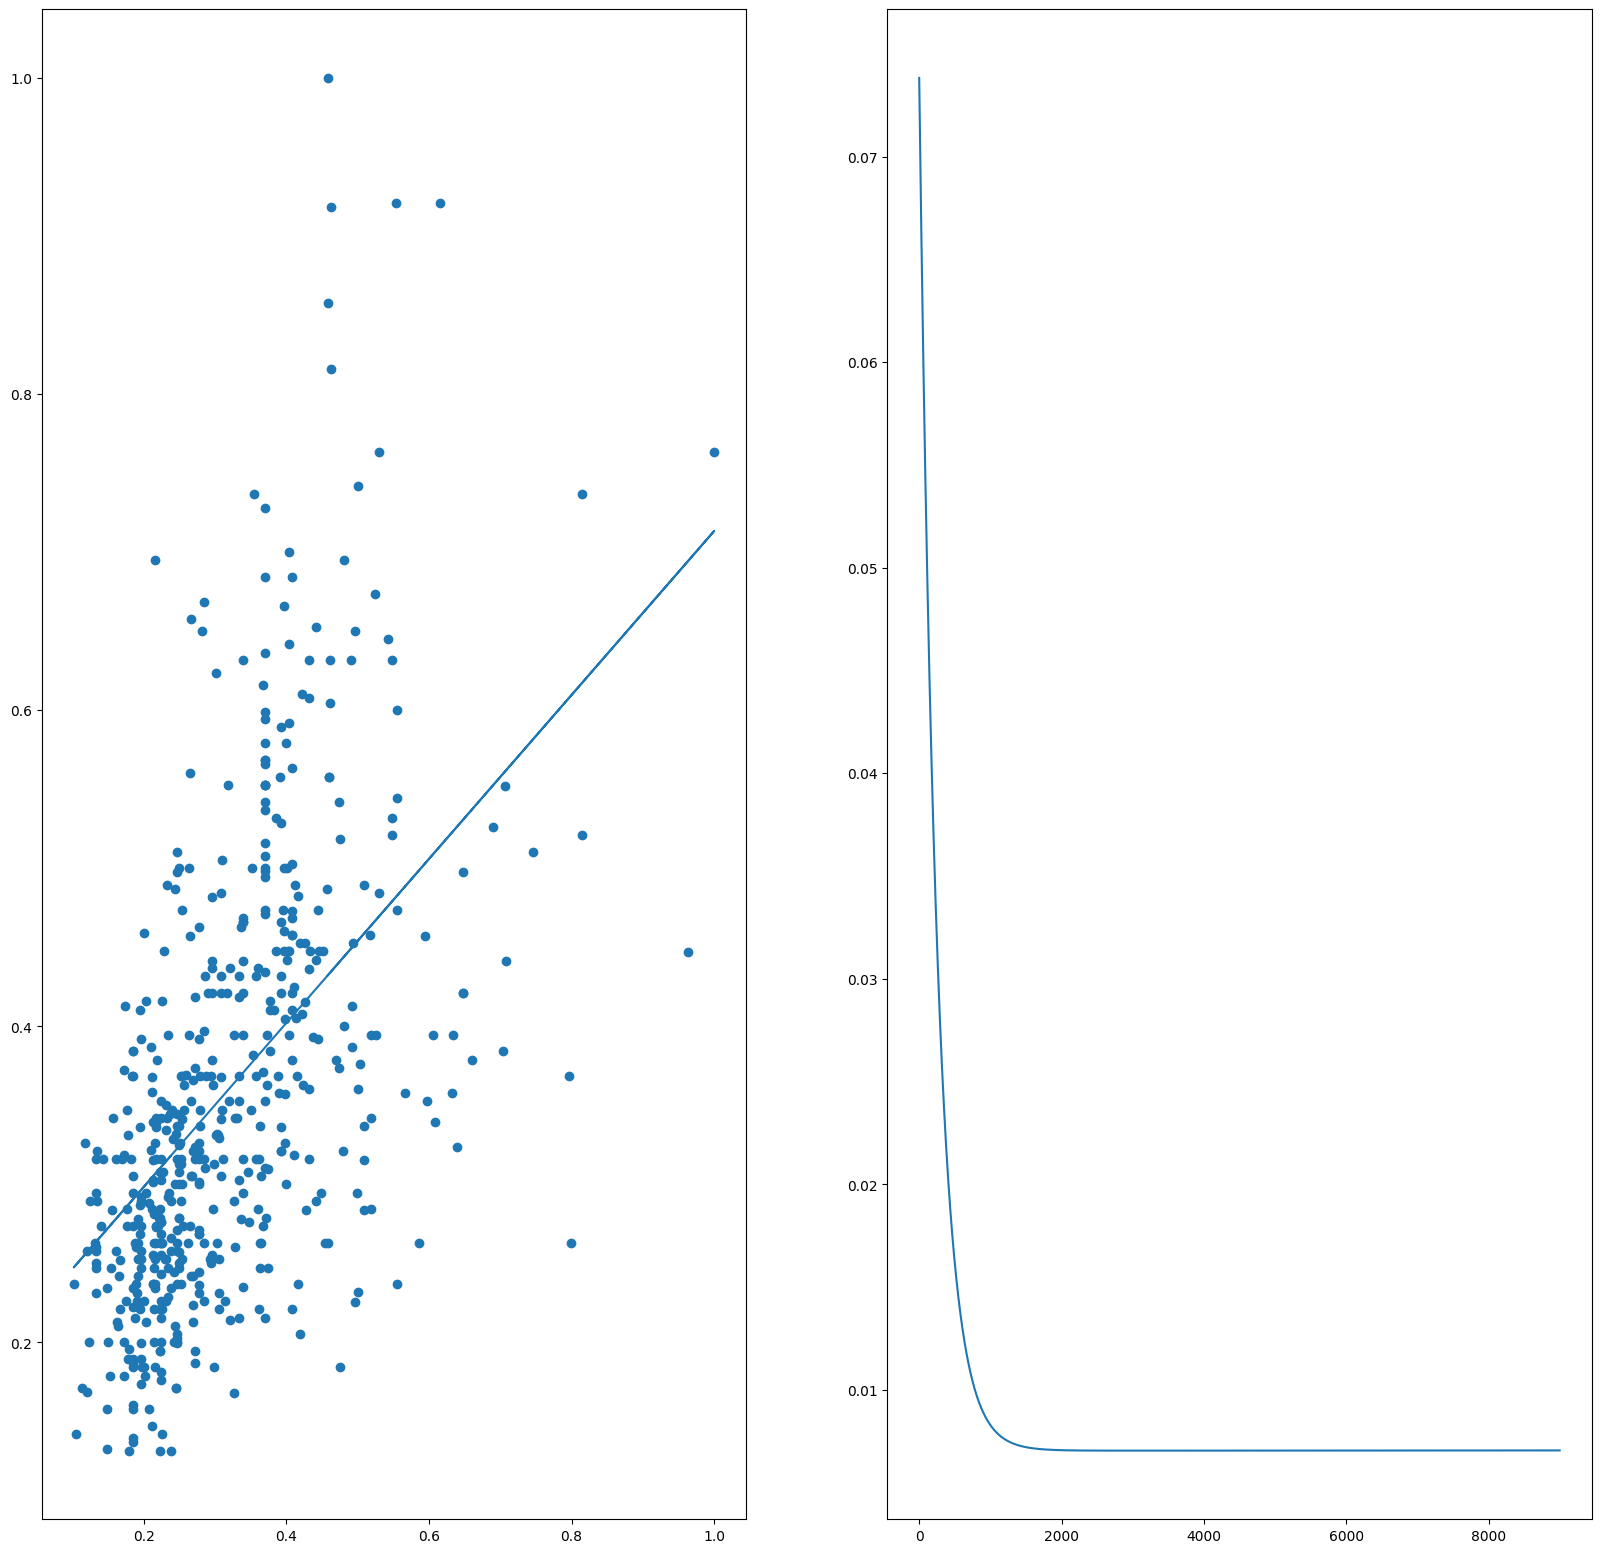

In [97]:
fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = (20, 20), dpi = 100)
axes1 = axes[0]
axes2 = axes[1]
axes1.scatter(area, price)
axes1.plot(area, w * area + b)

axes2.plot(np.arange(0, len(J_history)), J_history)

# fig.subplots_adjust(hspace = 5, wspace = 10)


In [99]:
w * 0.4 + b

0.40216133342133603

### Multiple Linear Regression

### Cost function for multiple Linear Regression

In [148]:
def mcompute_cost(X, y, w, b):
    cost = 0
    m, n = X.shape
    for i in range(m):
        f_wb_i = np.dot(X.iloc[i], w) + b
        cost_function = (f_wb_i - y[i]) ** 2
        cost += cost_function
    return cost / (2 * m)


In [103]:
np.zeros((5,))

array([0., 0., 0., 0., 0.])

### Compute Gradient Descent with Multiple Variables

In [149]:
def mcompute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    for i in range(m):
        err = np.dot(X.iloc[i], w) + b - y[i]
        for j in range(n):
            dj_dw[j] = (dj_dw[j] + err) * X.iloc[i][j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

### Gradient Descent of multiple variables for finding optimal w and b

In [150]:
def mgradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, y, w, b)
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)
        if i < 100000:
            J_history.append(cost_function(X, y, w, b))
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
    return w, b, J_history



### Testing Multiple Linear Regression

In [106]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [151]:
area = df['area'] / df['area'].max()
bedrooms = df['bedrooms'] / df['bedrooms'].max()
stories = df['stories']  / df['stories'].max()

X = pd.concat([area, bedrooms, stories], axis = 1)
y = df['price']


In [145]:
m, n = X.shape

In [146]:
m

545

In [154]:
w_in = np.zeros(3)
b_in = 0
alpha = 0.01
w, b, J_history = mgradient_descent(X, y, w_in, b_in, mcompute_cost, mcompute_gradient, alpha, 1000)

Iteration    0: Cost 12880701086966.14   
Iteration  100: Cost 3238323507907.94   
Iteration  200: Cost 1948038298848.21   
Iteration  300: Cost 1775517441892.45   
Iteration  400: Cost 1753102681713.54   
Iteration  500: Cost 1751034598387.87   
Iteration  600: Cost 1751793871445.24   
Iteration  700: Cost 1752971801983.59   
Iteration  800: Cost 1754221547454.46   
Iteration  900: Cost 1755487597892.93   


In [160]:
w, b

(array([-13574.7728869 , -41723.16352197, -31035.08886227]), 4800843.901180688)

ValueError: x and y must have same first dimension, but have shapes (1,) and (1000,)

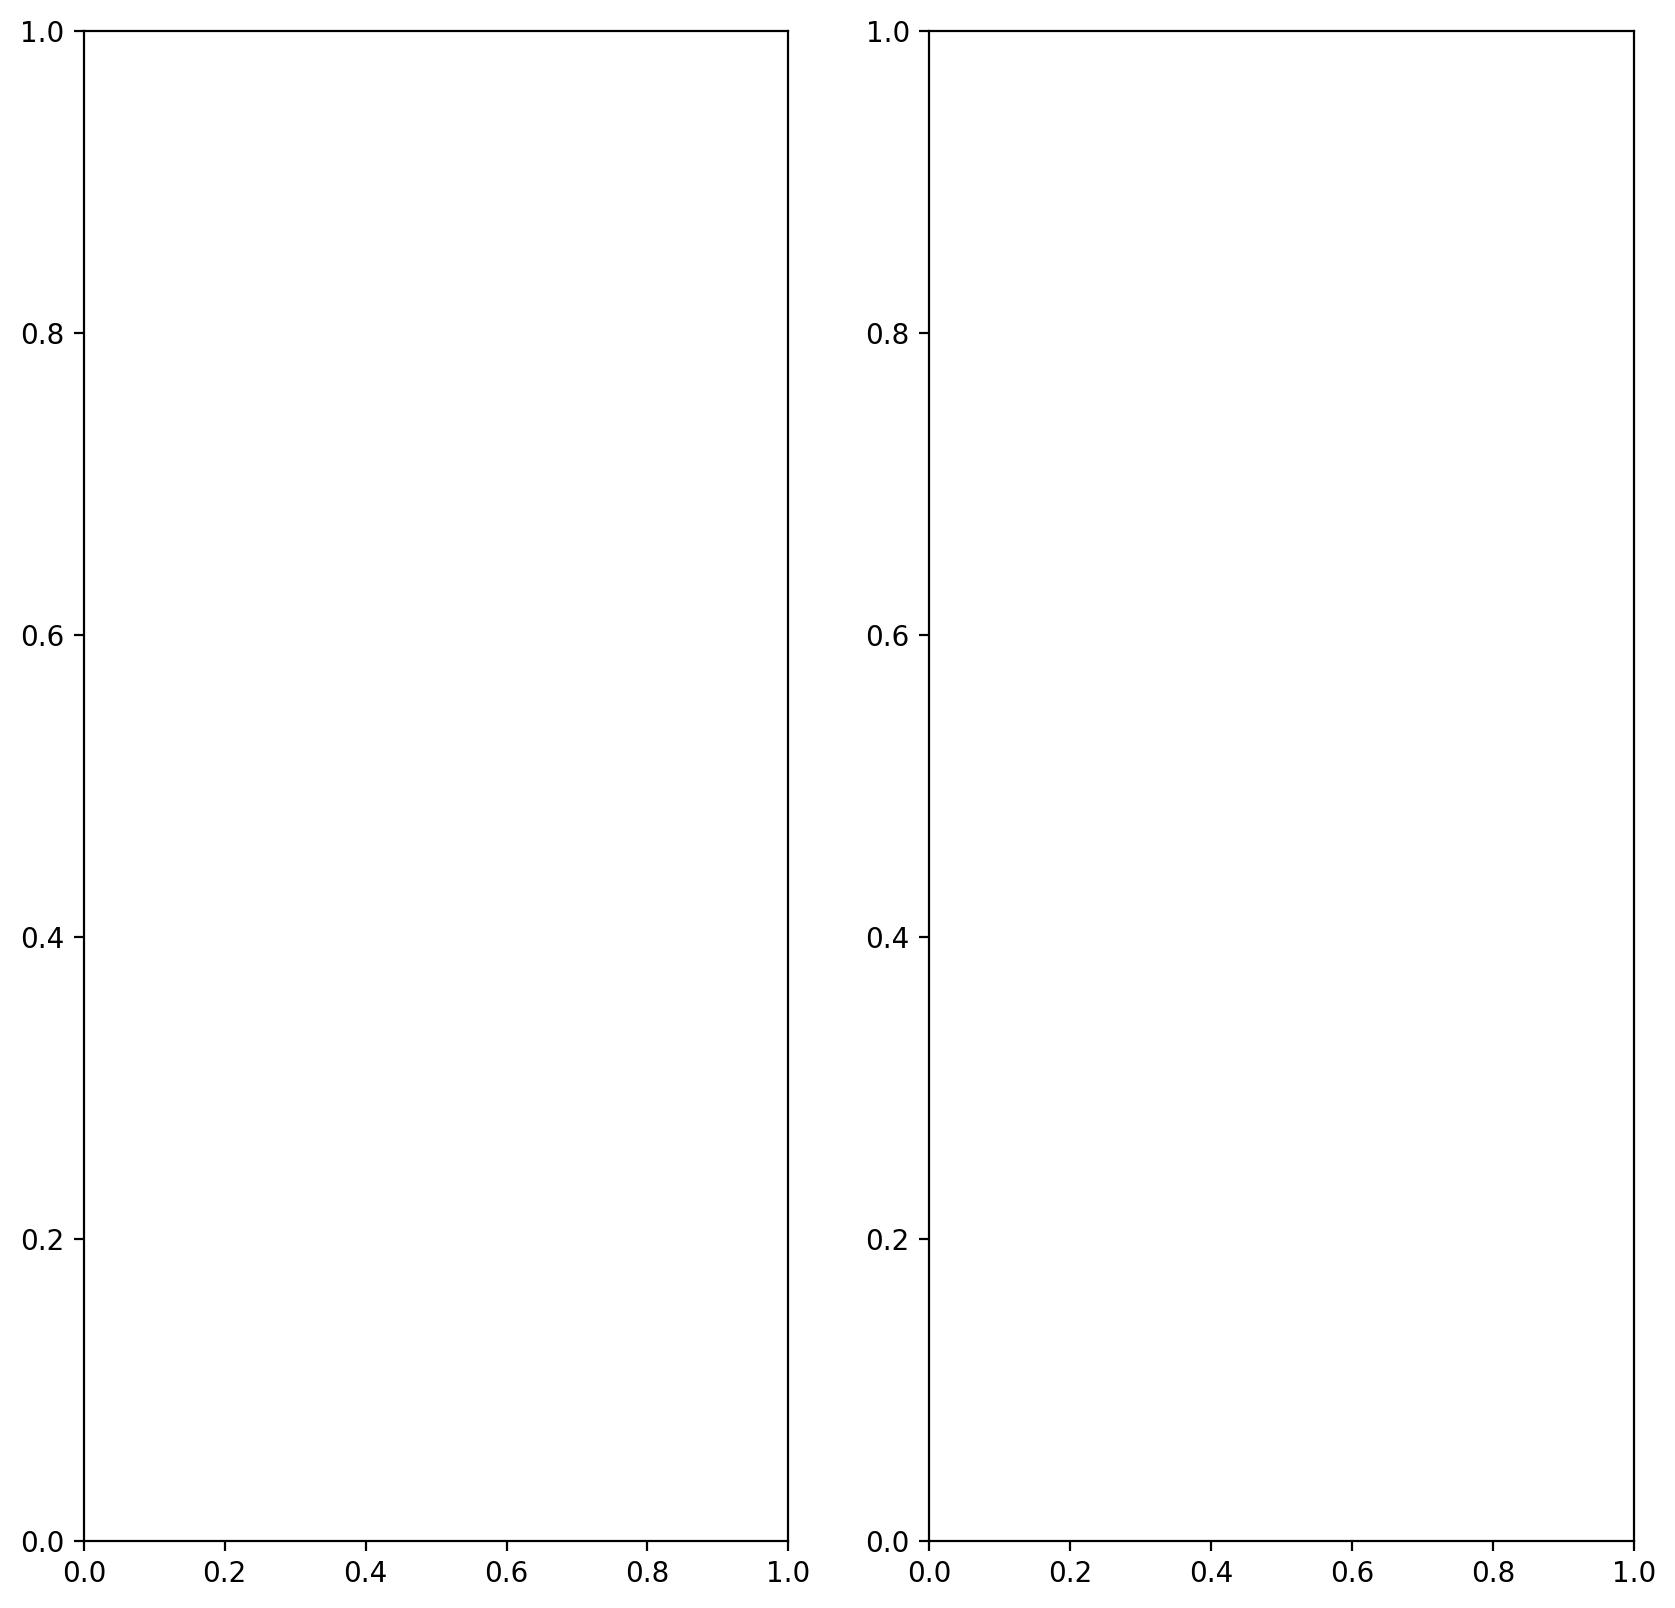

In [162]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 10), dpi = 200)
#axes[0].plot(X, w[0] * X['area'] + w[1] * X['bedrooms'] + w[2] * X['stories'] + b)
axes[0].plot(np.arange(0, len(J_history)), J_history)
